# Global mean Sea Surface Temperatures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import platform
import os

plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [2]:
year1=1982
year2=2023

In [3]:
#To compute de climatoloy
yearC1='1982'
yearC2='1992'

## Load data

In [4]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
elif os.uname().nodename.lower().find('rossby') != -1:
    base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [5]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]
DS = xr.open_mfdataset(files)

In [6]:
# Load data1

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = DS.sst.sel(lat=slice(0,80))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = DS.sst.sel(lat=slice( -80, 0))

titulo_short = 'GO'
titulo = 'Global Ocean'
sst = DS.sst.sel(lat=slice( -80, 80))

#titulo_short = 'NTenerife'
#titulo = 'North Tenerife'
#sst = DS.sst.sel(lon=slice(360-16.,360-15.),lat=slice(28.50,28.75))

## Global mean

>>>>> Global OceanGO
    > Global mean


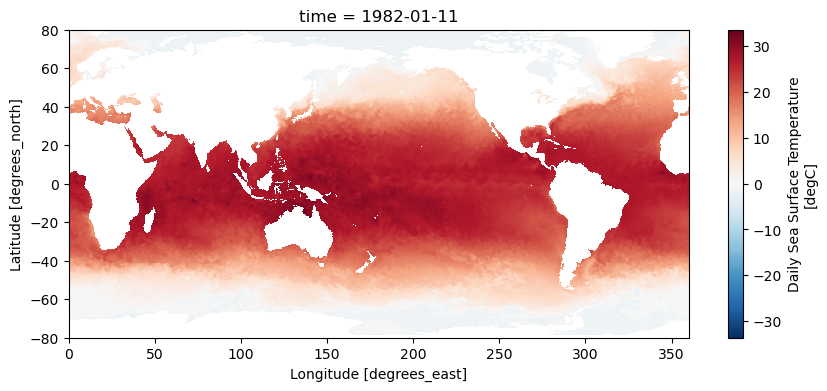

In [4]:
sst[10,:,:].plot()
print('>>>>> '+titulo+titulo_short)
print('    > Global mean')

In [5]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)
sst_wmean = sst_weighted.mean(("lon", "lat"),skipna=True).load()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [7]:
#Create monthly climatology
sst_clim = sst.sel(time=slice(yearC1,yearC2)).groupby('time.dayofyear').mean(dim='time').load();

NameError: name 'sst' is not defined

In [ ]:
#Create anomaly
sst_anom = sst.groupby('time.dayofyear') - sst_clim

In [ ]:
sst_clim[:,100,40].plot()

## Global mean anomaly

In [10]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_anom_weighted = sst_anom.weighted(weights)
sst_anom_wmean = sst_anom_weighted.mean(("lon", "lat"),skipna=True).load()

In [11]:
# smoothed versions
sst_wmean_rolling = sst_wmean.rolling(time=360,center=True).mean()
sst_anom_wmean_rolling = sst_anom_wmean.rolling(time=360,center=True).mean()

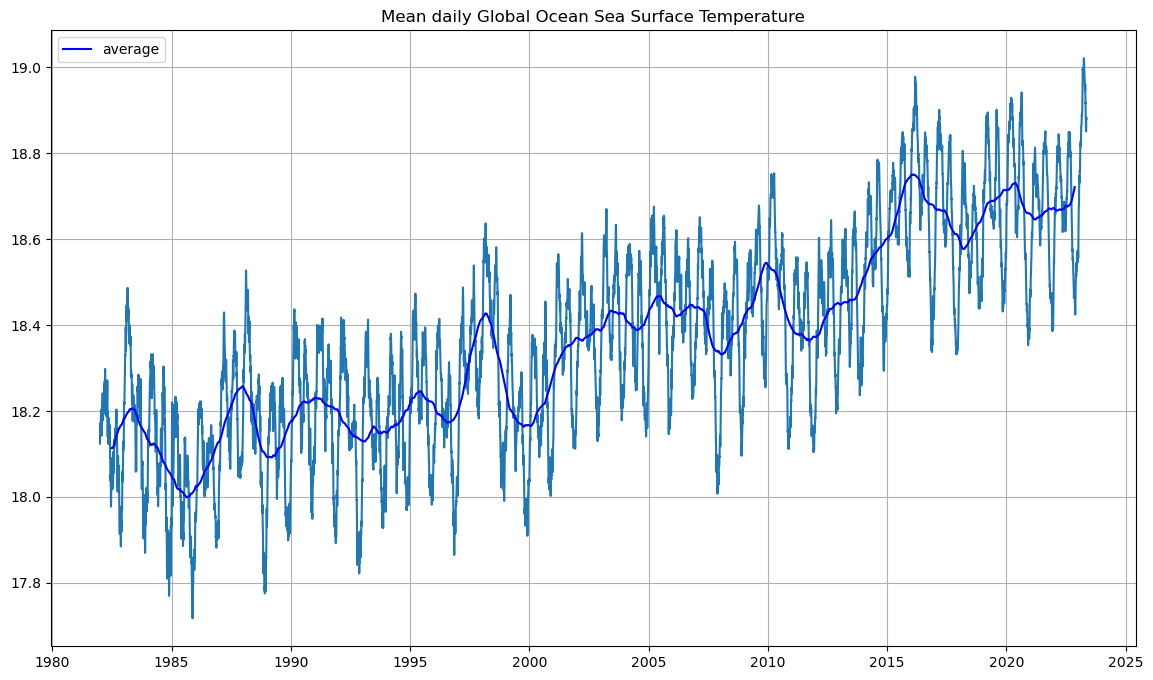

In [13]:
fig, ax = plt.subplots(1, 1 , figsize=(14,8))
ax.plot(sst_wmean.time,sst_wmean)
ax.plot(sst_wmean_rolling.time,sst_wmean_rolling,'-b',label='average')
ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature');

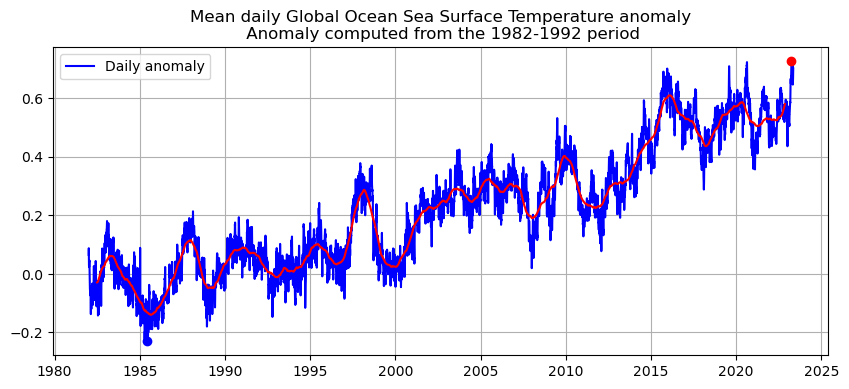

In [15]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sst_anom_wmean.time        ,sst_anom_wmean,'b',label='Daily anomaly')
ax.plot(sst_anom_wmean_rolling.time,sst_anom_wmean_rolling,'r')

ax.plot(sst_anom_wmean.time.isel(sst_anom_wmean.argmax(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmax(...)),'ro')
ax.plot(sst_anom_wmean.time.isel(sst_anom_wmean.argmin(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmin(...)),'bo')

ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature anomaly\n Anomaly computed from the 1982-1992 period');

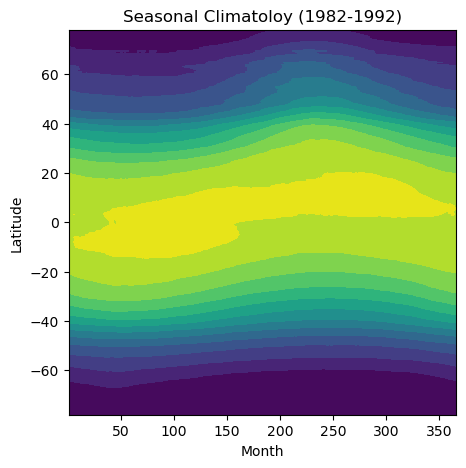

In [16]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(sst_clim.mean(dim='lon').dayofyear,
                 sst_clim.mean(dim='lon').lat,
                 sst_clim.mean(dim='lon').transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + year1 + '-' + year2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

In [20]:
sst_anom_LD=sst_anom[-1,:,:]
sst_anom_LD

<xarray.DataArray 'sst' (lat: 640, lon: 1440)>
dask.array<getitem, shape=(640, 1440), dtype=float32, chunksize=(640, 1440), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 2023-05-11
  * lat        (lat) float32 -79.88 -79.62 -79.38 -79.12 ... 79.38 79.62 79.88
  * lon        (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    dayofyear  int64 131

In [21]:
sst_anom_LD.to_netcdf(dataDir + '/sstLD_anom_'+titulo_short+'.nc',mode='w')
sst_wmean.to_netcdf(dataDir + '/Psstd_mean_'+titulo_short+'.nc',mode='w')
sst_clim.to_netcdf(dataDir + '/Psstd_clim_'+titulo_short+'.nc',mode='w')
sst_anom_wmean.to_netcdf(dataDir + '/Psstd_anom_mean_'+titulo_short+'.nc',mode='w')

In [22]:
sst_anom_LD.to_netcdf('./data/sstLD_anom_'+titulo_short+'.nc',mode='w')